<a href="https://colab.research.google.com/github/starsinc1708/MusicRecomendations/blob/master/manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Для начала работы необходимо загрузить файлы из репозитория на GitHub.

In [ ]:
!git clone https://github.com/starsinc1708/MusicRecomendations.git

fatal: destination path 'MusicRecomendations' already exists and is not an empty directory.


## Руководство по файлам репозитория.
### Папка Data Collection

1.   all_spotify_tracks.csv - содержит в себе датасет треков Spotify с необходимыми для анализа свойствами.
2.   your_liked_tracks.csv - содержит треки пользователя из коллекции "Любимые треки" своего аккаунта Spotify.






# Анализ Плейлиста
## Разведочный анализ данных

Spotify API предоставляет возможность получить свойства каждого трека.
Самыми важными в данной работе являются:

*   **acousticness** - АКУСТИЧНОСТЬ. Мера достоверности того, что композиция является акустической.
*   **danceability** - ТАНЦЕВАЛЬНОСТЬ. Генерируется на основе комбинации: темпа, ритма, силы ударов в музыке.
*   **instrumentalness** - ИНСТРУМЕНТАЛЬНОСТЬ. Показывает, какая компонента преобладает в треке голос или музыка.
*   **loudness** - ГРОМКОСТЬ. Общая громкость композиции в децибелах (dB).
*   **tempo** - ТЕМП. Проще говоря, количество ударов в песне в минуту (BPM);
*   **valence** - НАСТРОЕНИЕ. Означает степень позитивности композиции.
*   **energy** - ЭНЕРГИЧНОСТЬ. Мера интенсивности и активности.



---


**ПРИМЕЧАНИЕ**
Если вы хотите загрузить для анализа треки из плейлиста "Любимые треки", то необходимо сделать следующее:

*   Откройте приложение Spotify на ПК
*   Откройте плейлист «Любимые треки» и пролистайте его в самый конец, чтобы все треки прогрузились.
*   Нажмите на комбинацию клавиш CTRL + A
*   ПКМ по списку песен, наводимся на «Добавить в плейлист»
*   Выбираем существующий плейлист или создаем новый (если создаете новый, то плейлист будет называться по последней добавленной песне).



---




Код ниже предоставляет графический анализ пользовательского плейлиста, по свойствам аудио (audio_features).

В ячейку ниже необходимо вставить ссылку на свой плейлист Spotify



In [ ]:
playlist_url = 'https://open.spotify.com/playlist/51WDRItSGTxLXWLLzyW08g'

устанавливаем библиотеку для работы с Spotify API

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем необходимые библиотеки для работы с Spotify API

In [ ]:
import spotipy
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from spotipy import SpotifyClientCredentials

## Графический анализ пользовательского плейлиста

---------------------------------
Audio Features collection started
PLAYLIST_ID = https://open.spotify.com/playlist/51WDRItSGTxLXWLLzyW08g
PLAYLIST_NAME = USER_LIKED
---------------------------------
Audio Features collection is finished
---------------------------------


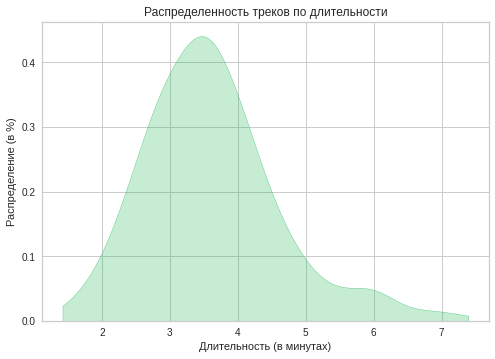

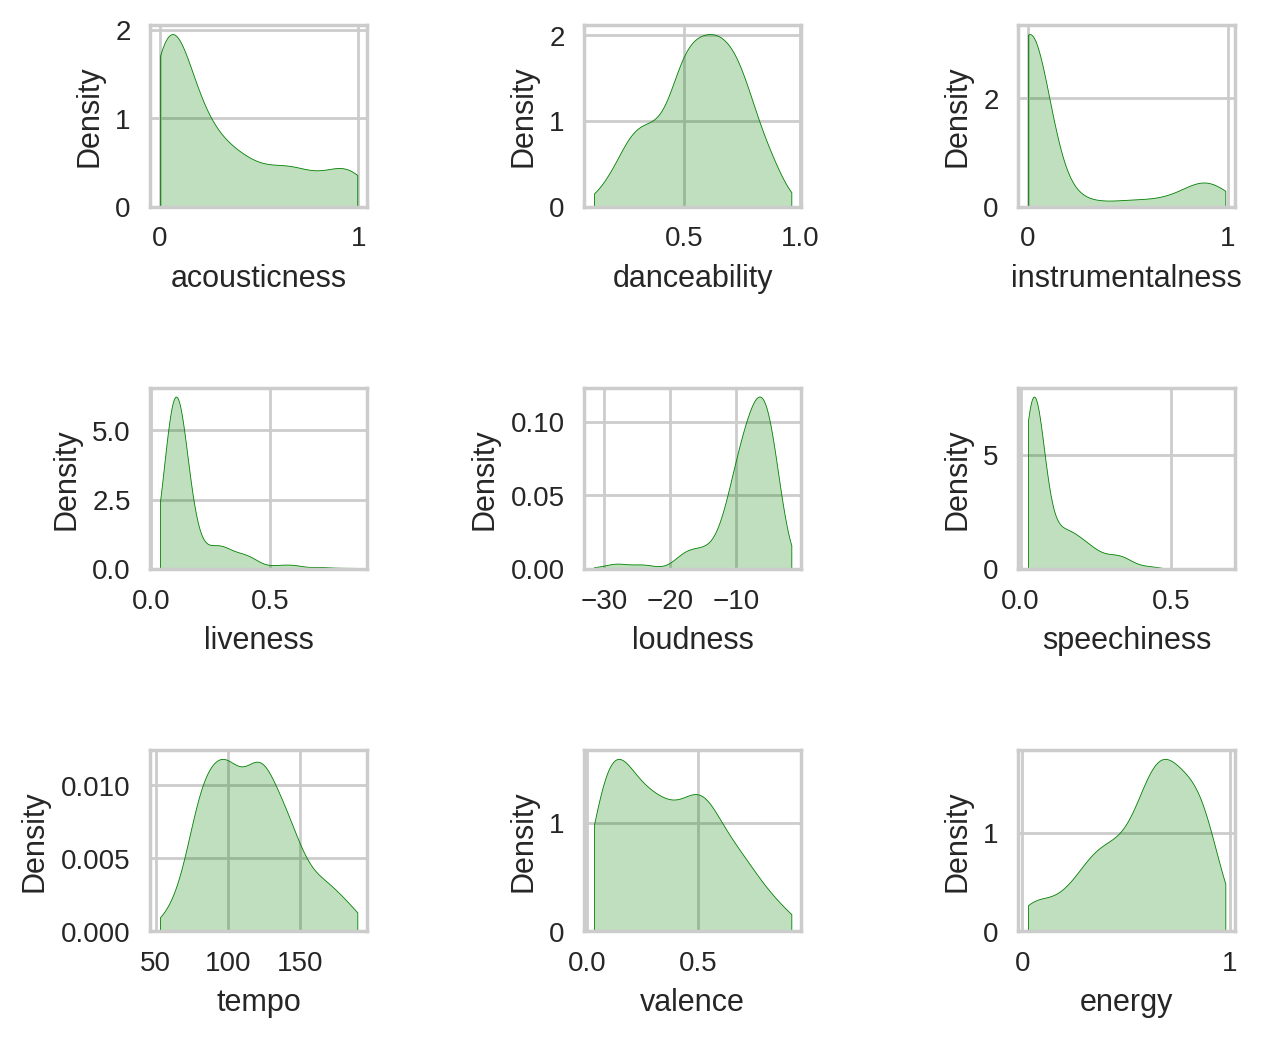

In [ ]:
client_id = "1325c0f83be24e988096fdf61f1f94d1"
client_secret = "105cb7762cd64ace870270f6831f65b2"
redirect_uri = "http://localhost:3000"

playlist_url = playlist_url.split("?")[0]
scope = "user-library-read"

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

user_playlist_tracks = {'id': [],
                        'title': [],
                        'main_artist': [],
                        'acousticness': [],
                        'danceability': [],
                        'energy': [],
                        'duration_ms': [],
                        'instrumentalness': [],
                        'key': [],
                        'liveness': [],
                        'loudness': [],
                        'mode': [],
                        'speechiness': [],
                        'tempo': [],
                        'time_signature': [],
                        'valence': []}

i = 0
while True:
    results = sp.playlist_tracks(playlist_id=playlist_url,
                                 limit=50, offset=i)
    if len(results['items']) != 0:
        for idx, item in enumerate(results['items']):
            track = item['track']
            user_playlist_tracks['main_artist'].append(track['artists'][0]['name'])
            user_playlist_tracks['title'].append(track['name'])
            user_playlist_tracks['id'].append(track['id'])
        i += 50
    else:
        break

print(f"---------------------------------\n"
      f"Audio Features collection started\n"
      f"PLAYLIST_ID = {playlist_url}\n"
      f"PLAYLIST_NAME = {sp.playlist(playlist_id=playlist_url)['name']}\n"
      f"---------------------------------")

for i in range(len(user_playlist_tracks['title'])):
    tf = sp.audio_features(user_playlist_tracks['id'][i])
    user_playlist_tracks['acousticness'].append(tf[0]['acousticness'])
    user_playlist_tracks['danceability'].append(tf[0]['danceability'])
    user_playlist_tracks['energy'].append(tf[0]['energy'])
    user_playlist_tracks['duration_ms'].append(tf[0]['duration_ms'])
    user_playlist_tracks['instrumentalness'].append(tf[0]['instrumentalness'])
    user_playlist_tracks['key'].append(tf[0]['key'])
    user_playlist_tracks['liveness'].append(tf[0]['liveness'])
    user_playlist_tracks['loudness'].append(tf[0]['loudness'])
    user_playlist_tracks['mode'].append(tf[0]['mode'])
    user_playlist_tracks['speechiness'].append(tf[0]['speechiness'])
    user_playlist_tracks['tempo'].append(tf[0]['tempo'])
    user_playlist_tracks['time_signature'].append(tf[0]['time_signature'])
    user_playlist_tracks['valence'].append(tf[0]['valence'])

print("Audio Features collection is finished\n"
      "---------------------------------")
user_playlist_tracks['duration_min'] = list()

for i in range(len(user_playlist_tracks['duration_ms'])):
    user_playlist_tracks['duration_min'].append(user_playlist_tracks['duration_ms'][i] / 60000)

tracks_DataFrame = pd.DataFrame.from_dict(user_playlist_tracks)

ax = sns.kdeplot(tracks_DataFrame['duration_min'], fill=True, color="#1DB954", cut=0)

plt.xlabel("Длительность (в минутах)")
plt.ylabel("Распределение (в %)")
plt.title("Распределенность треков по длительности")
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(7, 6), dpi=200)
fig.subplots_adjust(hspace=1, wspace=1)

pylab.subplot(3, 3, 1)
ac = sns.kdeplot(tracks_DataFrame['acousticness'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 2)
ac = sns.kdeplot(tracks_DataFrame['danceability'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 3)
ac = sns.kdeplot(tracks_DataFrame['instrumentalness'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 4)
ac = sns.kdeplot(tracks_DataFrame['liveness'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 5)
ac = sns.kdeplot(tracks_DataFrame['loudness'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 6)
ac = sns.kdeplot(tracks_DataFrame['speechiness'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 7)
ac = sns.kdeplot(tracks_DataFrame['tempo'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 8)
ac = sns.kdeplot(tracks_DataFrame['valence'], fill=True, color="green", cut=0)
pylab.subplot(3, 3, 9)
ac = sns.kdeplot(tracks_DataFrame['energy'], fill=True, color="green", cut=0)
plt.show()

# Неконтролируемое обучение
В неконтролируемом обучении у нас существуют только входные данные (X) без соответсвующих им выходных.

*Цель* - извлечение информации из взятых мной образцов без присвоенных значений "нравится" или "не нравится".

---

Основные проблемы неконтролируемого обучения можно сгруппировать в проблемы кластеризации и ассоциации.

**Кластеризация** - суть проблемы заключается в том, что мы хотим обнаружить присущие входным данным группы. Например, группы покупателей по купленным товарам.

**Ассоциация** - проблема изучения правил ассоциации заключается в том, что мы должны обнаружить правила, описывающие большие части наших входных данных.Ннапример, люди, которые покупают X, также склонны покупать Y.

In [ ]:
import spotipy
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy.spatial import KDTree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings('ignore')

Преобразование данных, полученных от Spotify API в pandas.DataFrame:

In [ ]:
def create_data_from_playlist(uri, sp):
    playlist_id = uri.split('/')[4]

    results = sp.playlist_tracks(playlist_id=playlist_id,
                                 limit=1, offset=0)

    playlist_tracks = {'id': [],
                       'playlist_id': [],
                       'title': [],
                       'main_artist': [],
                       'acousticness': [],
                       'danceability': [],
                       'energy': [],
                       'duration_ms': [],
                       'instrumentalness': [],
                       'key': [],
                       'liveness': [],
                       'loudness': [],
                       'mode': [],
                       'speechiness': [],
                       'tempo': [],
                       'time_signature': [],
                       'valence': []}

    j = 0
    # получаем все треки текущего плейлиста
    while True:
        tracks = sp.playlist_tracks(playlist_id=playlist_id,
                                    limit=50,
                                    offset=j)
        if len(tracks['items']) != 0:
            # проходим по всем трекам из заполняем артиста, название, id плейлиста, id трека
            for idx, item in enumerate(tracks['items']):
                track = item['track']
                playlist_tracks['main_artist'].append(track['artists'][0]['name'])
                playlist_tracks['title'].append(track['name'])
                playlist_tracks['playlist_id'].append(playlist_id)
                playlist_tracks['id'].append(track['id'])
            j += 50
        else:
            break

    print(f"---------------------------------\n"
          f"Audio Features collection started\n"
          f"PLAYLIST_ID = {playlist_id}\n"
          f"PLAYLIST_NAME = {sp.playlist(playlist_id=playlist_id)['name']}\n"
          f"---------------------------------")

    # заполняем audio features текущего плейлиста
    for k in range(len(playlist_tracks['title'])):
        tf = sp.audio_features(playlist_tracks['id'][k])
        playlist_tracks['acousticness'].append(tf[0]['acousticness'])
        playlist_tracks['danceability'].append(tf[0]['danceability'])
        playlist_tracks['energy'].append(tf[0]['energy'])
        playlist_tracks['duration_ms'].append(tf[0]['duration_ms'])
        playlist_tracks['instrumentalness'].append(tf[0]['instrumentalness'])
        playlist_tracks['key'].append(tf[0]['key'])
        playlist_tracks['liveness'].append(tf[0]['liveness'])
        playlist_tracks['loudness'].append(tf[0]['loudness'])
        playlist_tracks['mode'].append(tf[0]['mode'])
        playlist_tracks['speechiness'].append(tf[0]['speechiness'])
        playlist_tracks['tempo'].append(tf[0]['tempo'])
        playlist_tracks['time_signature'].append(tf[0]['time_signature'])
        playlist_tracks['valence'].append(tf[0]['valence'])

    print("Audio Features collection is finished\n")

    playlist_tracks['duration_min'] = list()

    for l in range(len(playlist_tracks['duration_ms'])):
        playlist_tracks['duration_min'].append(playlist_tracks['duration_ms'][l] / 60000)

    return playlist_tracks


playlist_url = playlist_url.split("?")[0]
df = create_data_from_playlist(playlist_url, sp)
data = pd.DataFrame.from_dict(df)

---------------------------------
Audio Features collection started
PLAYLIST_ID = 51WDRItSGTxLXWLLzyW08g
PLAYLIST_NAME = USER_LIKED
---------------------------------
Audio Features collection is finished



In [ ]:
data.head()

In [ ]:
data = data.dropna()
data.dtypes

## Предварительная обработка данных: преобразование признаков
Я выполнил масштабирование признаков, чтобы на векторы главных компонентов не влияли естественные различия в масштабе признаков.

Это гарантирует, что наши окончательные результаты не будут искажены функциональными единицами.

Например, темп обычно находится в диапазоне от 60 до 180 ударов в минуту, в то время как большинство других аудиосвойств находится где-то между 0 и 1. Без масштабирования две песни с разными темпами всегда будут очень «далеко друг от друга», даже если значения других показателей будут близки.




In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'duration_ms', 'time_signature']
scaler = StandardScaler()
scaler.fit(data[features])
features_scaled = scaler.transform(data[features])

## PCA: анализ главных  компонентов

**Анализ главных компонентов (PCA)** является одним из наиболее распространенных методов уменьшения линейной размерности. Он подчеркивает вариативность и выявляет сильные закономерности в наборе данных. Другими словами, он берет все переменные, а затем представляет их в меньшем пространстве, максимально сохраняя природу исходных данных.

---


*   Первая главная компонента в 1 измерении будет вмещать максимум отклонений набора данных;

*   Вторая компонента будет вмещать столько оставшихся отклонений, сколько возможно, чтобы оставаться ортогональной первой компоненте, и т. д.




### PCA с 3 компонентами: 3D визуализация

In [ ]:
pca = PCA(n_components=3, random_state=42)
df_pca = pd.DataFrame(data=pca.fit_transform(features_scaled), columns=['PC1', 'PC2', 'PC3'])
pca.components_
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(data[features].columns)), data[features], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Представление в 3D:

Для цветового разделения на составные части следует выбрать свойство, важность которого показывает анализ выше. В случае с моим плейлистом это **танцевальность** (danceability), так как параметр **mode** слабо влияет на субъективную оценку трека.

In [ ]:
df_pca_fix = df_pca.merge(data, left_index=True, right_index=True)
df_pca_fix = df_pca_fix[['PC1', 'PC2', 'PC3', 'title', 'main_artist', 'danceability']]

df_pca_fix.head()

In [ ]:
# Plot the PCA
px.scatter_3d(df_pca_fix,
              x='PC1',
              y='PC2',
              z='PC3',
              title='Principal Component Analysis Projection (3-D)',
              color='danceability',
              size=np.ones(len(df_pca_fix)),
              size_max=5,
              height=600,
              hover_name='title',
              hover_data=['main_artist'],
              color_continuous_scale=px.colors.cyclical.mygbm[:-6]).show()

Мы можем видеть позицию каждой песни и ее расстояние до других песен на основе преобразованных свойсв аудио.
Большинство точек сосредоточено на зеленоватых участках.

График также подтверждает, что danceability в некоторой степени коррелирует с PC2. Так как треки с наименьшим значением танцевальности расположены на графике на значительном удалении от большого состредоточения точек.


### Уменьшение размерности с n числом компонент


In [ ]:
pca = PCA()
df_pca = pca.fit_transform(features_scaled)

num_components = len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cumvals)
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')
plt.show()

pca = PCA(n_components=10)
df_pca = pca.fit_transform(features_scaled)
pca.components_
print(pca.explained_variance_ratio_)

Можно наблюдать как после 10 компонент значение дисперсии становится чрезвычайно низким.

## Кластеризация
**Кластеризация** — это задача разделения набора данных на группы сходства, называемые кластерами.

Алгоритмы кластеризации присваивают каждой точке данных номер, указывающий, к какому кластеру она принадлежит.


### Кластеризация данных с помощью K-средних

Основная идея кластеризации k-средних заключается в том, что мы выбираем, сколько кластеров мы хотим создать. Мы выбираем это на основе знания предметной области (может быть, у нас есть некоторые маркетинговые исследования количества различных типов групп, которые мы ожидаем увидеть в наших клиентах), на основе «наилучшего предположения» или случайным образом.

В конце у вас остаются области, которые определяют, в каком кластере будет классифицироваться вновь назначенная точка.

#### 2D визуализация (2 кластера)

In [ ]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(features_scaled)
data_2 = data.copy()
data_2 = data_2[features]
data_2['labels'] = model.labels_

In [ ]:
data_2['labels'].value_counts()

In [ ]:
data_2.groupby('labels').mean()

In [ ]:
sns.lmplot(data=data_2, x='valence', y='danceability', hue='labels', fit_reg=False, legend=True)
sns.lmplot(data=data_2, x='energy', y='loudness', hue='labels', fit_reg=False, legend=True)
sns.lmplot(data=data_2, x='danceability', y='loudness', hue='labels', fit_reg=False, legend=True)
sns.lmplot(data=data_2, x='danceability', y='acousticness', hue='labels', fit_reg=False, legend=True)
sns.lmplot(data=data_2, x='danceability', y='tempo', hue='labels', fit_reg=False, legend=True)

#### Оптимальное количество кластеров
Одним из самых сложных и важных параметров для оптимизации является количество кластеров.

*   Наличие слишком большого количества кластеров может означать, что мы на самом деле мало что узнали о данных — весь смысл кластеризации заключается в выявлении относительно небольшого количества сходств, существующих в наборе данных. 
*   Малое количество кластеров может означать, что мы искусственно группируем данные.

---

Существует множество различных методов выбора подходящего количества кластеров, но один из самых распространенных методов заключается в вычислении метрики для каждого количества кластеров, а затем построении графика зависимости функции ошибок от количества кластеров.

**KElbowVisualizer** от **Yellowbrick** реализует метод **«локтя»** для выбора оптимального количества кластеров путем подбора модели K-средних с диапазоном значений для K.

In [ ]:
X = features_scaled
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(X)  
visualizer.show()  
# fits the model for a range of  K  values from 1 to 9, which is set by the parameter k=(1,10).
# we see that the model is fit with 3 clusters - we can see an "elbow" in the graph.

можно видеть "локоть на графике, который показывает оптимальное число кластеров для текущего набора данных

# Создание рекомендаций 
перед выполнением следующих ячеек кода необходимо удалить предыдущие переменные.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


В ячейку ниже необходимо вставить ссылку на свой плейлист Spotify

**ПРИМЕЧАНИЕ**
Если вы хотите загрузить для анализа треки из плейлиста "Любимые треки", то необходимо сделать следующее:

*   Откройте приложение Spotify на ПК
*   Откройте плейлист «Любимые треки» и пролистайте его в самый конец, чтобы все треки прогрузились.
*   Нажмите на комбинацию клавиш CTRL + A
*   ПКМ по списку песен, наводимся на «Добавить в плейлист»
*   Выбираем существующий плейлист или создаем новый (если создаете новый, то плейлист будет называться по последней добавленной песне).

In [ ]:
playlist_url = 'https://open.spotify.com/playlist/51WDRItSGTxLXWLLzyW08g'

Выберите количество рекомендаций:

In [230]:
number_of_recomendations = 15

In [ ]:
import spotipy
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from spotipy import SpotifyClientCredentials


client_id = "1325c0f83be24e988096fdf61f1f94d1"
client_secret = "105cb7762cd64ace870270f6831f65b2"
redirect_uri = "http://localhost:3000"
playlist_url = playlist_url.split("?")[0]
scope = "user-library-read"

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
def create_data_from_playlist(uri, sp):
    playlist_id = uri.split('/')[4]

    results = sp.playlist_tracks(playlist_id=playlist_id,
                                 limit=1, offset=0)

    playlist_tracks = {'id': [],
                       'playlist_id': [],
                       'title': [],
                       'main_artist': [],
                       'acousticness': [],
                       'danceability': [],
                       'energy': [],
                       'duration_ms': [],
                       'instrumentalness': [],
                       'key': [],
                       'liveness': [],
                       'loudness': [],
                       'mode': [],
                       'speechiness': [],
                       'tempo': [],
                       'time_signature': [],
                       'valence': []}

    j = 0
    # получаем все треки текущего плейлиста
    while True:
        tracks = sp.playlist_tracks(playlist_id=playlist_id,
                                    limit=50,
                                    offset=j)
        if len(tracks['items']) != 0:
            # проходим по всем трекам из заполняем артиста, название, id плейлиста, id трека
            for idx, item in enumerate(tracks['items']):
                track = item['track']
                playlist_tracks['main_artist'].append(track['artists'][0]['name'])
                playlist_tracks['title'].append(track['name'])
                playlist_tracks['playlist_id'].append(playlist_id)
                playlist_tracks['id'].append(track['id'])
            j += 50
        else:
            break

    print(f"---------------------------------\n"
          f"Audio Features collection started\n"
          f"PLAYLIST_ID = {playlist_id}\n"
          f"PLAYLIST_NAME = {sp.playlist(playlist_id=playlist_id)['name']}\n"
          f"---------------------------------")

    # заполняем audio features текущего плейлиста
    for k in range(len(playlist_tracks['title'])):
        tf = sp.audio_features(playlist_tracks['id'][k])
        playlist_tracks['acousticness'].append(tf[0]['acousticness'])
        playlist_tracks['danceability'].append(tf[0]['danceability'])
        playlist_tracks['energy'].append(tf[0]['energy'])
        playlist_tracks['duration_ms'].append(tf[0]['duration_ms'])
        playlist_tracks['instrumentalness'].append(tf[0]['instrumentalness'])
        playlist_tracks['key'].append(tf[0]['key'])
        playlist_tracks['liveness'].append(tf[0]['liveness'])
        playlist_tracks['loudness'].append(tf[0]['loudness'])
        playlist_tracks['mode'].append(tf[0]['mode'])
        playlist_tracks['speechiness'].append(tf[0]['speechiness'])
        playlist_tracks['tempo'].append(tf[0]['tempo'])
        playlist_tracks['time_signature'].append(tf[0]['time_signature'])
        playlist_tracks['valence'].append(tf[0]['valence'])

    print("Audio Features collection is finished\n")

    playlist_tracks['duration_min'] = list()

    for l in range(len(playlist_tracks['duration_ms'])):
        playlist_tracks['duration_min'].append(playlist_tracks['duration_ms'][l] / 60000)

    return playlist_tracks


df = create_data_from_playlist(playlist_url, sp)
data = pd.DataFrame.from_dict(df)

features = ['danceability',
                'energy',
                'key',
                'loudness',
                'mode',
                'acousticness',
                'instrumentalness',
                'liveness',
                'valence',
                'tempo']

---------------------------------
Audio Features collection started
PLAYLIST_ID = 51WDRItSGTxLXWLLzyW08g
PLAYLIST_NAME = USER_LIKED
---------------------------------
Audio Features collection is finished



Загружаем данные для обучения из all_spotify_tracks.csv и удаляем из них треки, которые есть в пользовательском плейлисте.

In [ ]:
all_songs = pd.read_csv('MusicRecomendations/Data Collection/all_spotify_tracks.csv')
all_songs.drop_duplicates(subset="id", keep=False, inplace=True)
all_songs = all_songs.loc[~(all_songs.id.isin(data['id'])), :]

## Кластеризация

In [ ]:
from scipy.spatial import KDTree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
scaler.fit(all_songs[features])
all_songs_features_scaled = scaler.transform(all_songs[features])

Определяем оптимальное количество кластеров для all_tracks

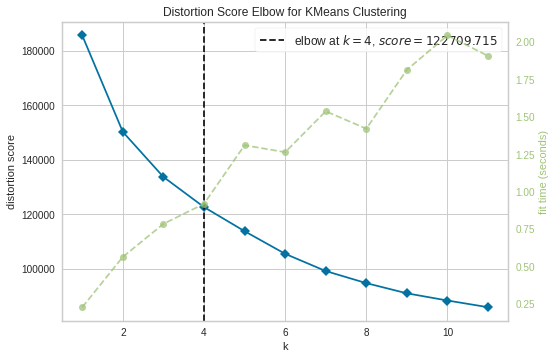

In [ ]:
X = all_songs_features_scaled
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmean = KMeans(n_clusters=visualizer.elbow_value_)
kmean.fit(all_songs_features_scaled)

pred = kmean.labels_
all_songs['labels'] = pred

# проверка кластеров
all_songs.head()

,id,playlist_id,title,main_artist,acousticness,danceability,energy,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,labels
0,1Qrg8KqiBpW07V7PNxwwwL,37i9dQZF1DXcBWIGoYBM5M,Kill Bill,SZA,0.0521,0.644,0.735,153947.0,0.144000,8.0,0.1610,-5.747,1.0,0.0391,88.980,4.0,0.418,2.565783333333333,1
1,0V3wPSX9ygBnCm8psDIegu,37i9dQZF1DXcBWIGoYBM5M,Anti-Hero,Taylor Swift,0.1300,0.637,0.643,200690.0,0.000002,4.0,0.1420,-6.571,1.0,0.0519,97.008,4.0,0.533,3.3448333333333333,1
2,0WtM2NBVQNNJLh6scP13H8,37i9dQZF1DXcBWIGoYBM5M,Calm Down (with Selena Gomez),Rema,0.3820,0.801,0.806,239318.0,0.000669,11.0,0.1140,-5.206,1.0,0.0381,106.999,4.0,0.802,3.9886333333333335,1
3,2dHHgzDwk4BJdRwy9uXhTO,37i9dQZF1DXcBWIGoYBM5M,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.4170,0.715,0.620,221520.0,0.000000,1.0,0.0822,-6.005,0.0,0.0484,97.950,4.0,0.172,3.692,2
4,3nqQXoyQOWXiESFLlDF1hG,37i9dQZF1DXcBWIGoYBM5M,Unholy (feat. Kim Petras),Sam Smith,0.0130,0.714,0.472,156943.0,0.000005,2.0,0.2660,-7.375,1.0,0.0864,131.121,4.0,0.238,2.6157166666666667,1


In [ ]:
all_songs['labels'].value_counts()

1    6685
2    4950
0    4747
3    2180
Name: labels, dtype: int64

In [ ]:
df = data.copy()
pred_df = kmean.predict(df[features])

df['songs group'] = pred_df

df = df.reset_index()
df = df.drop(columns=['index'])
df.head()

,id,playlist_id,title,main_artist,acousticness,danceability,energy,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,songs group
0,1CqOEa4NIRBaWR6sNHTDTo,51WDRItSGTxLXWLLzyW08g,Как тебя покорить,Перемотка,0.00677,0.514,0.966,218764,0.042200,2,0.3820,-4.854,1,0.0502,91.025,4,0.802,3.646067,0
1,4QGV75zJdM68DDbeXvlXOz,51WDRItSGTxLXWLLzyW08g,Первый снег,Перемотка,0.01180,0.548,0.862,179442,0.893000,11,0.2080,-6.984,1,0.0333,100.815,4,0.609,2.990700,0
2,0E5kJzyQhf4m02ooeO9tTy,51WDRItSGTxLXWLLzyW08g,Vchera,AL-90,0.02980,0.650,0.609,323000,0.875000,8,0.1060,-9.038,1,0.0663,119.993,4,0.180,5.383333,0
3,3Y7yePf9MtKCJbzeuqBJmN,51WDRItSGTxLXWLLzyW08g,шесть,тима ищет свет,0.08410,0.663,0.841,190146,0.000184,5,0.1010,-6.180,1,0.1440,166.065,4,0.762,3.169100,0
4,4zafGs520iPYGMd80DDoY6,51WDRItSGTxLXWLLzyW08g,Herz aus Stein,Arctic8,0.30100,0.637,0.787,204000,0.093200,6,0.0794,-10.296,0,0.0342,88.981,4,0.583,3.400000,0


## PCA 

In [ ]:
pca = PCA(n_components=3, random_state=42)
df_pca_all_songs = pd.DataFrame(data=pca.fit_transform(all_songs_features_scaled), columns=['PC1', 'PC2', 'PC3'])

In [ ]:
pca.components_
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28979102 0.15193633 0.1180786 ]


Text(0, 0.5, 'Principal components')

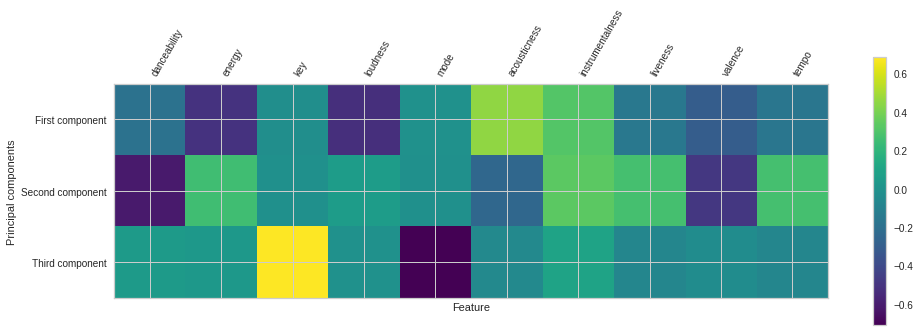

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(all_songs[features].columns)),all_songs[features], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [ ]:
df_pca_all_songs = df_pca_all_songs.merge(all_songs, left_index=True, right_index=True)
df_pca_all_songs = df_pca_all_songs[['PC1', 'PC2', 'PC3', 'title', 'main_artist']]

df_pca_all_songs.shape

(18333, 5)

In [ ]:
df_scaled = scaler.transform(df[features])

# use trained PCA
df_pca = pd.DataFrame(data=pca.transform(df_scaled), columns=['PC1','PC2','PC3'])

In [ ]:
df_pca = df_pca.merge(data, left_index=True, right_index=True)
df_pca = df_pca[['PC1', 'PC2', 'PC3', 'title', 'main_artist']]
df_pca.head()

,PC1,PC2,PC3,title,main_artist
0,-1.838074,-0.156517,-1.228233,Как тебя покорить,Перемотка
1,-0.313635,0.552018,0.832042,Первый снег,Перемотка
2,0.872866,0.717459,0.293390,Vchera,AL-90
3,-1.597198,-0.682683,-0.689558,шесть,тима ищет свет
4,0.056419,-1.175147,1.136139,Herz aus Stein,Arctic8


### Получение рекомендаций от PCA и ближайших соседей

In [ ]:
columns = ['PC1', 'PC2', 'PC3']

kdB = KDTree(df_pca_all_songs[columns].values)#all songs
neighbours = kdB.query(df_pca[columns].values, k=1)[-1]

print(neighbours.shape)

(295,)


In [242]:
from IPython.display import HTML
import plotly.graph_objects as go

recomendations = all_songs[all_songs.index.isin(neighbours[:number_of_recomendations])]

url_of_rec = []

for rec in recomendations['id']:
  track = sp.track(track_id=rec)
  url_of_rec.append(track['external_urls']['spotify'])

recomendations_output = recomendations[['title', 'main_artist']]
recomendations_output.columns = ['Song Recommendation', 'Artist']


def create_link(url:str) -> str:
    return f'''<a href="{url}">🔗</a>'''

recomendations_output['Link'] = [create_link(url) for url in url_of_rec]

fig = go.Figure(
    data=[
        go.Table(
            columnwidth = [1,1,0.2],
            header=dict(
                values=[f"<b>{i}</b>" for i in recomendations_output.columns],
                fill_color='pink'
                ),
            cells=dict(
                values=recomendations_output[['Song Recommendation', 'Artist', 'Link']].transpose(),
                align = 'left'
                )
            )
        ]
        
    )

fig.show()
